<a href="https://colab.research.google.com/github/Shreyas188/-Sentiment-Analysis-with-TF-IDF/blob/main/Text_Sentiment_Analysis_with_TF_IDF_Vectorization_and_ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: SHREYAS S

Topic : Text Sentiment Analysis with TF-IDF Vectorization and ML Algorithms

M.Tech in AI

FT_Batch_03

In [ ]:
# Run this once at the top of the notebook
!pip install -q datasets transformers evaluate sentencepiece scikit-learn matplotlib seaborn wordcloud python-docx python-pptx reportlab PyPDF2 nltk xgboost joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 6.4 MB/s eta 0:00:00


In [ ]:
# Standard imports and workspace
import os, shutil
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import nltk

# Create working folder
WORKDIR = "/content/improve_paper"
os.makedirs(WORKDIR, exist_ok=True)
os.chdir(WORKDIR)
print("Working directory:", WORKDIR)


Working directory: /content/improve_paper


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from datasets import load_dataset
dataset_name = "imdb"   # change to "tweet_eval" or "yelp_polarity" if you prefer
raw = load_dataset(dataset_name)
raw


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer globally
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean_text(s):
    if s is None: return ""
    s = s.lower()
    s = re.sub(r"http\S+"," ", s)
    s = re.sub(r"[^a-z0-9\s]", " ", s)
    tokens = nltk.word_tokenize(s)
    tokens = [t for t in tokens if t not in stop and len(t)>1]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)

def build_df(dataset_split, text_col='text', label_col='label', max_rows=None):
    df = pd.DataFrame(dataset_split)
    if max_rows:
        df = df.sample(n=min(max_rows,len(df)), random_state=42)
    df['clean_text'] = df[text_col].apply(clean_text)
    return df

# Build train/test pandas frames
train_df = build_df(raw['train'])
test_df  = build_df(raw['test'])
print("Train size:", len(train_df), "Test size:", len(test_df))
train_df.head(2)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Train size: 25000 Test size: 25000


,text,label,clean_text
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,rented curious yellow video store controversy ...
1,"""I Am Curious: Yellow"" is a risible and preten...",0,curious yellow risible pretentious steaming pi...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=30000, ngram_range=(1,2))
X_train = tfidf.fit_transform(train_df['clean_text'])
X_test  = tfidf.transform(test_df['clean_text'])
print("TF-IDF shapes:", X_train.shape, X_test.shape)

# save vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.joblib")


TF-IDF shapes: (25000, 30000) (25000, 30000)


['tfidf_vectorizer.joblib']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

y_train = train_df['label'].values
y_test  = test_df['label'].values

lr = LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("TF-IDF + LR — Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

# save model
joblib.dump(lr, "logistic_model.joblib")


TF-IDF + LR — Accuracy: 0.88676
              precision    recall  f1-score   support

           0     0.8873    0.8861    0.8867     12500
           1     0.8862    0.8874    0.8868     12500

    accuracy                         0.8868     25000
   macro avg     0.8868    0.8868    0.8868     25000
weighted avg     0.8868    0.8868    0.8868     25000



['logistic_model.joblib']

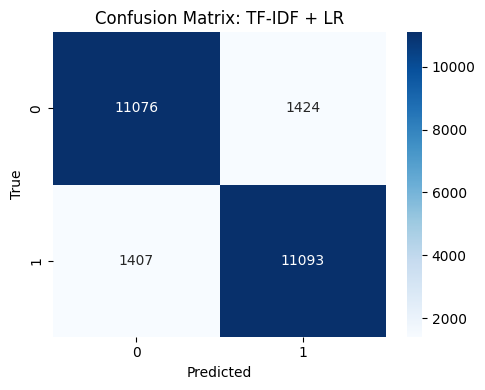

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix: TF-IDF + LR")
plt.tight_layout()
plt.savefig("cm_tfidf_lr.png", dpi=150)
plt.show()
plt.close()

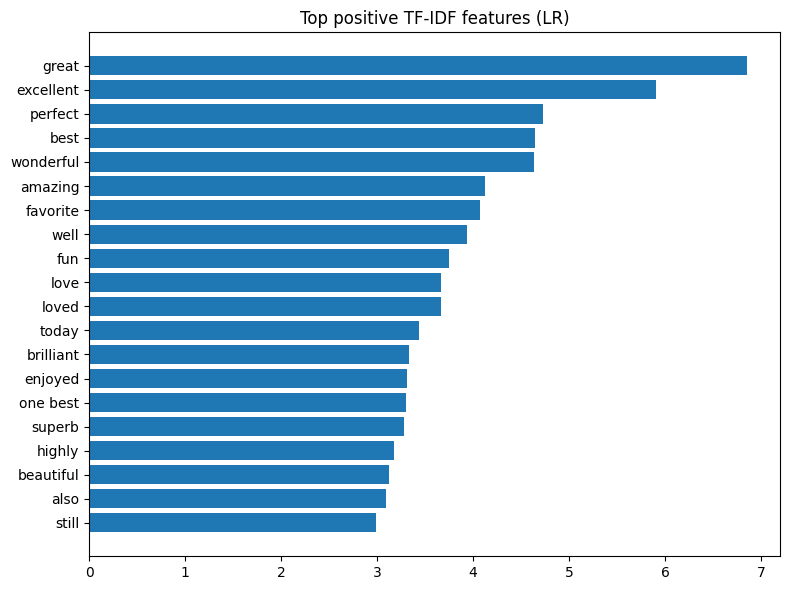

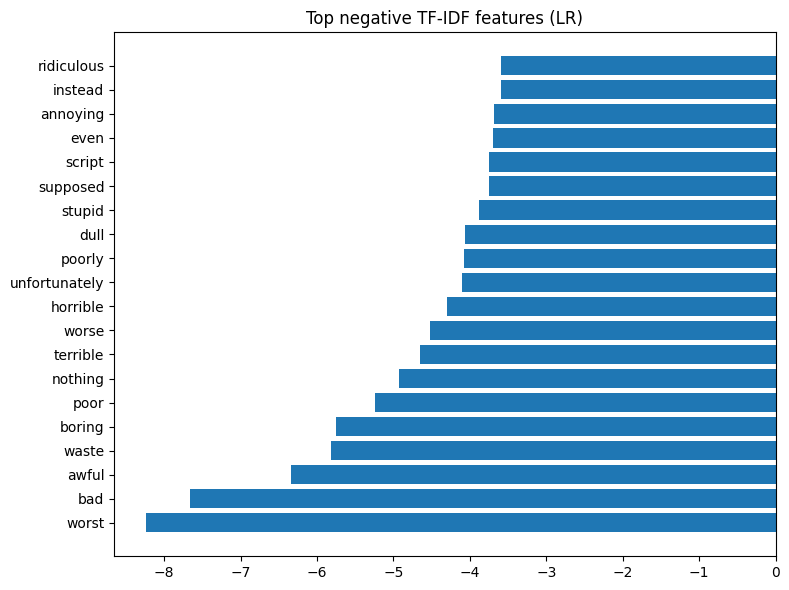

In [ ]:
# Top TF-IDF features (positive and negative)
coefs = lr.coef_[0]
feat_names = np.array(tfidf.get_feature_names_out())
top_pos_idx = np.argsort(coefs)[-20:]
top_neg_idx = np.argsort(coefs)[:20]

plt.figure(figsize=(8,6))
plt.barh(feat_names[top_pos_idx], coefs[top_pos_idx])
plt.title("Top positive TF-IDF features (LR)")
plt.tight_layout(); plt.savefig("top_pos_features.png", dpi=150); plt.show(); plt.close()

plt.figure(figsize=(8,6))
plt.barh(feat_names[top_neg_idx], coefs[top_neg_idx])
plt.title("Top negative TF-IDF features (LR)")
plt.tight_layout(); plt.savefig("top_neg_features.png", dpi=150); plt.show(); plt.close()


In [ ]:
import numpy as np
mis_idx = np.where(y_test != y_pred)[0][:200]  # up to 200 examples
examples = test_df.iloc[mis_idx][['text','clean_text']]
examples.to_csv("misclassified_examples.csv", index=False)
print("Saved misclassified examples to misclassified_examples.csv (first 200).")
examples.head(5)


Saved misclassified examples to misclassified_examples.csv (first 200).


,text,clean_text
4,"First off let me say, If you haven't enjoyed a...",first let say enjoyed van damme movie since bl...
11,"Blind Date (Columbia Pictures, 1934), was a de...",blind date columbia picture 1934 decent film i...
18,"Ben, (Rupert Grint), is a deeply unhappy adole...",ben rupert grint deeply unhappy adolescent son...
32,I'm the type of guy who loves hood movies from...,type guy love hood movie new jack city baby bo...
41,Widow hires a psychopath as a handyman. Sloppy...,widow hire psychopath handyman sloppy film noi...


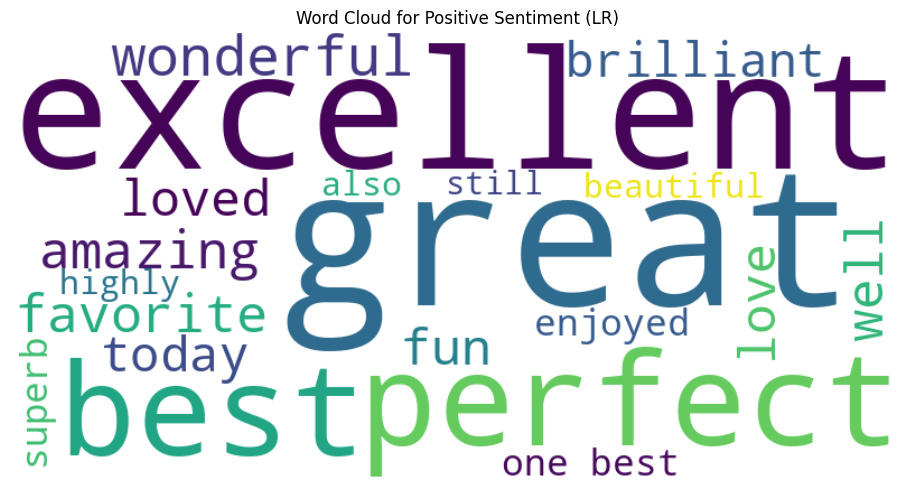

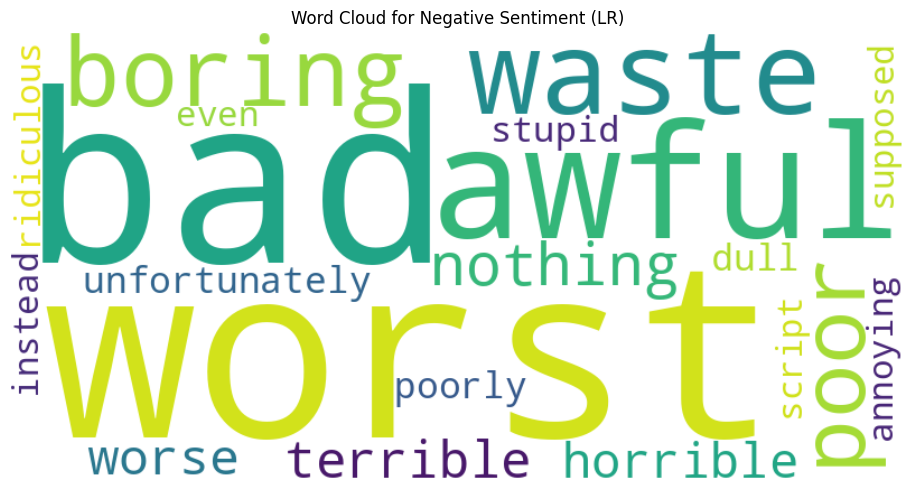

In [ ]:
from wordcloud import WordCloud

# Word cloud for positive sentiment
pos_coef_dict = dict(zip(feat_names[top_pos_idx], coefs[top_pos_idx]))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(pos_coef_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment (LR)')
plt.tight_layout()
plt.savefig('wordcloud_positive.png', dpi=150)
plt.show()
plt.close()

# Word cloud for negative sentiment
neg_coef_dict = dict(zip(feat_names[top_neg_idx], np.abs(coefs[top_neg_idx])))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(neg_coef_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment (LR)')
plt.tight_layout()
plt.savefig('wordcloud_negative.png', dpi=150)
plt.show()
plt.close()